In [ ]:
# Emulation results and paper plots for:
- https://edas.info/showPaper.php?m=1570568365

# vnet-ui-cli settings

In [1]:
#use line topology
nodes = ['service101.as101.sarnet-sc17-dev',                      
    'nfv61.as61.sarnet-sc17-dev',                            
    'transit51.as51.sarnet-sc17-dev',                            
    'transit52.as52.sarnet-sc17-dev',                        
    'transit53.as53.sarnet-sc17-dev',                        
    'transit54.as54.sarnet-sc17-dev',                        
    'transit55.as55.sarnet-sc17-dev',                        
    'transit56.as56.sarnet-sc17-dev',                        
    'transit57.as57.sarnet-sc17-dev',                        
    'transit58.as58.sarnet-sc17-dev',                        
]      

att = {}
att['1n'] = ['client12.as12.sarnet-sc17-dev']                     
att['1f'] = ['client18.as18.sarnet-sc17-dev']                     
att['2s'] = ['client12.as12.sarnet-sc17-dev', 'client18.as18.sarnet-sc17-dev']
att['al'] = [                                                     
    'client12.as12.sarnet-sc17-dev',                              
    'client13.as13.sarnet-sc17-dev',                              
    'client14.as14.sarnet-sc17-dev',                              
    'client15.as15.sarnet-sc17-dev',                              
    'client16.as16.sarnet-sc17-dev',                              
    'client17.as17.sarnet-sc17-dev',                              
    'client18.as18.sarnet-sc17-dev',                              
]                

evidence = []
for n2 in nodes:
    for n1 in nodes:
        if n1 == n2:
            continue
        for el in [5, 11, 0]:  #0.5 by default
            evidence.append(
            {'task': 'deploy', 'src': n1, 'tgt': n2, 'elapsed': el})
            if n1 == 'service101.as101.sarnet-sc17-dev' and \
               n2 == 'transit51.as51.sarnet-sc17-dev':
                evidence.append({'task': 'deploy', 'src': n1, 'tgt': n2, 'elapsed': 3})
                evidence.append({'task': 'deploy', 'src': n1, 'tgt': n2, 'elapsed': 3})
                #transit51 = 0.7
            elif n1 == 'service101.as101.sarnet-sc17-dev' and \
                 n2 == 'nfv61.as61.sarnet-sc17-dev':
                evidence.append({'task': 'deploy','src': n1, 'tgt': n2, 'elapsed': 20})
                evidence.append({'task': 'deploy', 'src': n1, 'tgt': n2, 'elapsed': 20})
                #nfv61 = 0.3
                
seed = 13

scenario_defaults = {
    'defense': [None],
    'attack': ['ddos'],
    'behaviour:delay': [0],
    'costs:fixed': [100],
    'costs:periodic': [0],
    'timeout': [180],
}
scenario = {}
for k, v in att.items():
    scenario['budget%s'%k] = {
        'level': ['8'],
        'behaviour:approach': [4],
        'behaviour:evidence': [evidence],
        'size': [1/len(v)],
        'delay': [3],
        'behaviour:seed': [seed],
        'behaviour:transit51.as51.sarnet-sc17-dev:success': [0.0000001],
        'behaviour:transit53.as53.sarnet-sc17-dev:success': [0.8],
        'behaviour:transit54.as54.sarnet-sc17-dev:success': [0.6],
        'behaviour:transit55.as55.sarnet-sc17-dev:success': [0.4],
        'behaviour:transit56.as56.sarnet-sc17-dev:success': [0.2],
        'behaviour:transit57.as57.sarnet-sc17-dev:success': [0.1],
        'behaviour:transit58.as58.sarnet-sc17-dev:success': [0.0000001],
        'trust_msg_filter': [['sim', 'preseed', 'deploy', ]],
        'budget': [900],
        'attackers': [v],
    }
    
# NOTE: client 15 and client16 are excluded from transactions (by stopping some services)
#    need to verify whether this is also from attacking

#print(list(scenario.items())[0]

In [2]:
%matplotlib inline

from newstyle import *
import pprint

In [3]:
def multi_run_plot(mdf, axis, sep, title=None):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    df_grouped = mdf.groupby(['situation', 'seq', 'approach'])
    df = df_grouped.mean()
    gmdf = mdf.groupby(['situation','seq', 'approach'])['efficiency'].agg(['mean'])
    gmdf = pd.DataFrame(gmdf)#.reset_index()
    df["STDEV"] = df_grouped.efficiency.apply(np.nanstd)
    gmdf = df
    cmdf = pd.DataFrame(df.groupby(['situation', 'approach']).cumcount())
    cmdf = cmdf.rename(columns={0: 'idx'})
    gmdf = gmdf.join(cmdf)
    mdf = gmdf.reset_index()

    g = sns.FacetGrid(mdf, col=sep, 
                      col_wrap=2, 
                      palette='muted',
                      hue='approach',  
                      hue_kws=dict(marker=['o', '^', 'v', 'x']))
    xticks=[x for x in mdf[axis[0]]]
    g.map(plt.errorbar, axis[0], axis[1], "STDEV", fmt='.').set_titles('{col_name}').set(xticks=xticks)

    for ax in g.axes.flat:
        ax.set_title(fullsit(ax.get_title()))
        if ax.get_xlabel() == 'size':
            ax.set_xlabel('attack size')
            ax.set_xticklabels(xticks, rotation=40, ha="center")
            ax.set_xticklabels(xticks, fontsize=8)
        elif ax.get_xlabel() == 'level':
            ax.set_xlabel('alliance size')
        elif ax.get_xlabel():
            ax.set_xlabel("attempt")
    if title:
        g.fig.subplots_adjust(top=0.9)
        g.fig.suptitle(title, fontsize=16)
 
        
    g.add_legend(title='Algorithm')

# per-dataset plots

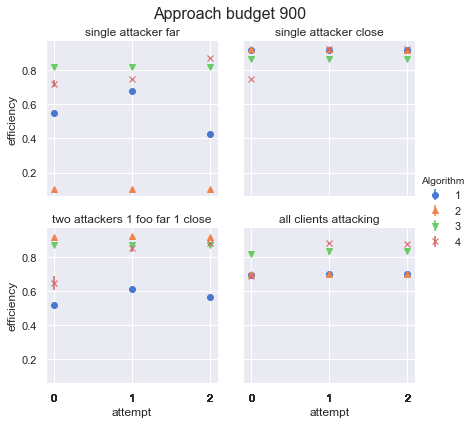

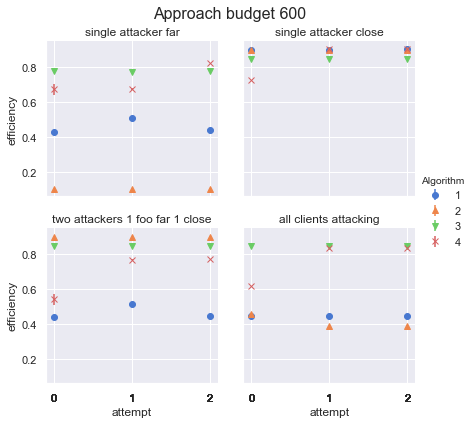

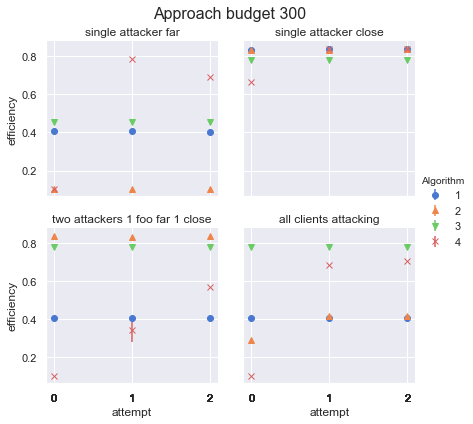

In [4]:
@build_df
def line_df(scenario, situation):
    f_list = ['appx4/approachesx4{}{}{}'.format(num, scenarios[scenario].name, situation) for num in ['']]
    return f_list

@build_df
def line2_df(scenario, situation):
    f_list = ['appx4/approachesx4-b600{}{}{}'.format(num, scenarios[scenario].name, situation) for num in ['']]
    return f_list

@build_df
def line3_df(scenario, situation):
    f_list = ['appx4/approachesx4-b300{}{}{}'.format(num, scenarios[scenario].name, situation) for num in ['']]
    return f_list
scenario = 0
situations = ['1n', '1f', '2s', 'al']
mdf = build_mdf(line_df, situations=situations, scenario=scenario).set_index(['pid','seq']).sort_index()
mdf2 = build_mdf(line2_df, situations=situations, scenario=scenario).set_index(['pid','seq']).sort_index()
mdf3 = build_mdf(line3_df, situations=situations, scenario=scenario).set_index(['pid','seq']).sort_index()


multi_run_plot(mdf, ['idx', 'efficiency'], 'situation', title="Approach budget 900" )

plt.savefig("budget900.eps")
multi_run_plot(mdf2, ['idx', 'efficiency'], 'situation', title="Approach budget 600" )

plt.savefig("budget600.eps")
multi_run_plot(mdf3, ['idx', 'efficiency'], 'situation', title="Approach budget 300" )

plt.savefig("budget300.eps")

# Per dataset ranking

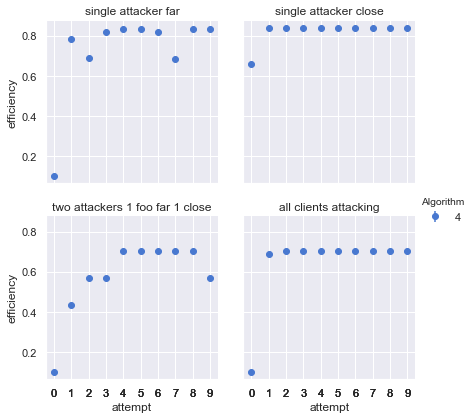

In [5]:
scenario = 0
@build_df
def line1_df(scenario, situation):
    f_list = ['appx4/approach4-rep10{}{}{}'.format(num, scenarios[scenario].name, situation) for num in ['']]
    return f_list

mdf = build_mdf(line1_df, situations=situations, scenario=scenario).set_index(['pid', 'seq']).sort_index()
multi_run_plot(mdf, ['idx', 'efficiency'], 'situation')


plt.savefig("efficiency-multiple.eps")


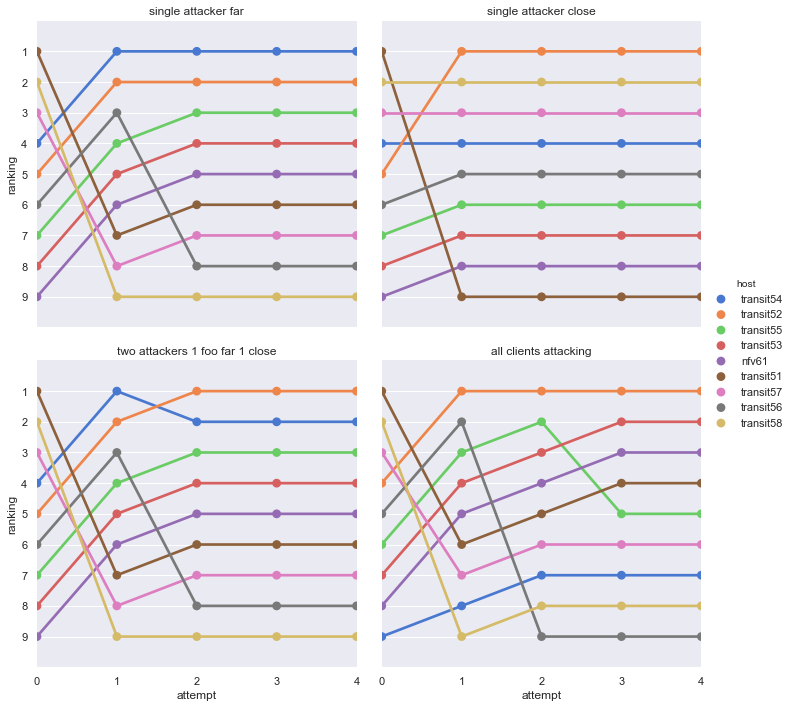

In [6]:
scenario = 0
situations = ['1n', '1f', '2s', 'al']

mdf = build_mdf(line1_df, situations=situations, scenario=scenario).set_index(['pid', 'seq']).sort_index()
mdf = mdf[(mdf['rid'] == 4) | (mdf['rid'] == 0)]
mdf = mdf.sort_values(by='situation')
rankdf = pd.DataFrame(ranking(mdf), columns = ['run', 'iter', 'situation', 'rank', 'host', 'risk', 'benevolence', 'random'])
rankdf['host'] = rankdf['host'].apply(sh)
rankdf['rank'] = rankdf['rank'].apply(lambda x: x+1)
rankdf['iter'] = rankdf['iter'].apply(lambda x: x-1)
g = sns.catplot(x="iter", y="rank", hue="host", col='situation', col_wrap=2,
                capsize=.2, palette="muted", kind="point", data=rankdf, ci='sd')
g.set(ylim=(10, 0))
g.set(xlim=(0, 4))
g.set(yticks=range(1,10))
for ax in g.axes.flat: 
    if ax.get_ylabel():
        ax.set_ylabel("ranking")
    if ax.get_xlabel():
        ax.set_xlabel("attempt")
    ax.set_title(fullsit(ax.get_title().split(' ')[2]))
    
g.despine(left=True)

plt.savefig("ranking.eps")


# Results: Managing Effective Collaboration in Cybersecurity Alliances Using Social Computational Trust (CSnet '19)

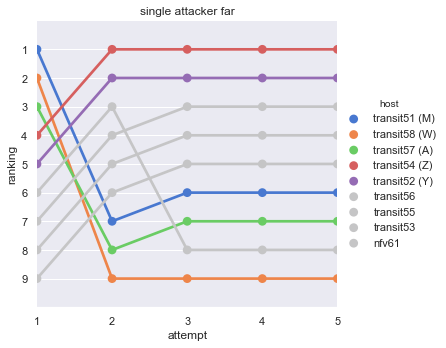

In [9]:
scenario = 0
situations = ['1f']

def amenehmap(hostname):
    tehmap = {'transit51': 'M',
     'transit52': 'Y',
     'transit54': 'Z',
     'transit57': 'A',
     'transit58': 'W',
    }
    if hostname in tehmap.keys():
        return hostname + ' (' + tehmap[hostname] + ')'
    else: 
        return hostname

def mypalette(hosts, palette='muted', greylist=[]):
    palette =  sns.color_palette(palette)
    ret_pal = []
    for host, color in zip(hosts, palette):
        if host not in greylist:
            ret_pal.append(color)
        else:
            ret_pal.append('#c5c5c6')
    return ret_pal


mdf = build_mdf(line1_df, situations=situations, scenario=scenario).set_index(['pid', 'seq']).sort_index()
mdf = mdf[(mdf['rid'] == 0)]
mdf = mdf.sort_values(by='situation')

rankdf = pd.DataFrame(ranking(mdf), columns = ['run', 'iter', 'situation', 'rank', 'host', 'risk', 'benevolence', 'random'])
rankdf['host'] = rankdf['host'].apply(sh)
rankdf['host'] = rankdf['host'].apply(amenehmap)
rankdf['rank'] = rankdf['rank'].apply(lambda x: x+1)
notcare = ['nfv61'] + ['transit{}'.format(x) for x in range(53, 59)]

g = sns.catplot(x="iter", y="rank", hue="host", col='situation', col_wrap=1,
                capsize=.2, palette=mypalette(rankdf['host'], 'muted', notcare), kind="point", data=rankdf, ci='sd')
g.set(ylim=(10, 0))
g.set(xlim=(0, 4))
g.set(yticks=range(1,10))
for ax in g.axes.flat: 
    if ax.get_ylabel():
        ax.set_ylabel("ranking")
    if ax.get_xlabel():
        ax.set_xlabel("attempt")
    ax.set_title(fullsit(ax.get_title().split(' ')[2]))
    
g.despine(left=True)
plt.savefig("ranking-1f.eps")

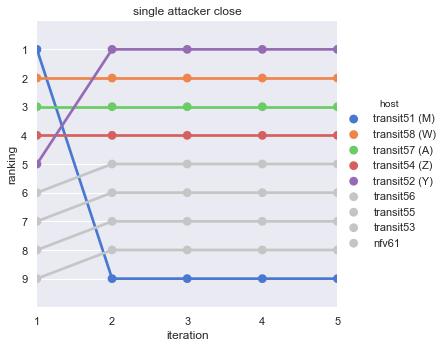

In [8]:
scenario = 0
situations = ['1n']

def mypalette(hosts, palette='muted', greylist=[]):
    palette =  sns.color_palette(palette)
    ret_pal = []
    for host, color in zip(hosts, palette):
        if host not in greylist:
            ret_pal.append(color)
        else:
            ret_pal.append('#c5c5c6')
    return ret_pal

def amenehmap(hostname):
    tehmap = {
     'transit51': 'M',
     'transit52': 'Y',
     'transit54': 'Z',
     'transit57': 'A',
     'transit58': 'W',
    }
    if hostname in tehmap.keys():
        return hostname + ' (' + tehmap[hostname] + ')'
    else: 
        return hostname


mdf = build_mdf(line1_df, situations=situations, scenario=scenario).set_index(['pid', 'seq']).sort_index()
mdf = mdf[(mdf['rid'] == 0)]
mdf = mdf.sort_values(by='situation')

rankdf = pd.DataFrame(ranking(mdf), columns = ['run', 'iter', 'situation', 'rank', 'host', 'risk', 'benevolence', 'random'])
rankdf['host'] = rankdf['host'].apply(sh)
rankdf['host'] = rankdf['host'].apply(amenehmap)
#notcare = [amenehmap(h) for h in notcare]
notcare = ['nfv61'] + ['transit{}'.format(x) for x in range(53, 59)]
rankdf['rank'] = rankdf['rank'].apply(lambda x: x+1)
g = sns.catplot(x="iter", y="rank", hue="host", col='situation', col_wrap=1,
                capsize=.2, palette=mypalette(rankdf['host'], 'muted', notcare), kind="point", data=rankdf, ci='sd')
g.set(ylim=(10, 0))
g.set(xlim=(0, 4))
g.set(yticks=range(1,10))
for ax in g.axes.flat: 
    if ax.get_ylabel():
        ax.set_ylabel("ranking")
    if ax.get_xlabel():
        ax.set_xlabel("iteration")
    ax.set_title(fullsit(ax.get_title().split(' ')[2]))
    
g.despine(left=True)
plt.savefig("ranking-1n.eps")

# fluctuations post-mortem 

The fluctuations between runs are caused by the use of RNGs when defending. They are expected and by design.

There two RNGs that influence defenses: 

## sarnet.response_rng
This rng is created when sarnet-agent multi domain component starts. Gets seeded (and reset) when behaviour is set. Behaviour is set between runs (when evdb is also reset) between iterations the rng will not be set causing different behaviour.
response_rng is used when there is a success rate probability specified and determines if an agent is going to respond to the message.
between runs it should be the same. 
between iterations (different idx) it can influence the measurement.


## approach4.rng
This rng is created when an approach is instantiated. it lives between the start and expiry of the approach and is used as (a predictable) third ranking parameter in Approach4. 

An approach is reinstantiated between each run and iteration (idx) because we stop the attacks between each iteration and wait for all the observables to restore. This causes the attack to expire and a new one to be initiated. 

## conclusion
Slight variations between (iterations) idxes are caused by the sarnet.response_rng and the set probabilities. This can reesults in variations in all approaches. 




# notes about ranking for approach4 /5

There are some implementation considerations that influence the ranking


* Calls to integrity and competence are cached. The cache of both is cleared every 5secons at the same time.
Since risk calls competence and competence is asks from all the neighbors of the node (the whole alliance) requesting an expensive task. It can take as long as the member with the longest response time. 
In our environment response times are short. We chose a cache of 5 seconds to prevent hammering the network. 

* Ranking is done each time an approach is instantiated. It does not update based on newer risk when still running.
